In [67]:
# Problem 1: Analysis of Particle Swarm Optimisation (c.2) (10%)

# Packages
import numpy as np
import random as rand
import matplotlib.pyplot as plt

# Functions
def epsilon_close(x, y):
    return abs(x - y) < 0.001

def sphere(d, x):
    return np.sum(x**2)

def rastragin(d, x):
    return 10 * d + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))

def repulsion(d, N, X):
    Z = np.array([X-x for x in X])
    for i, x in enumerate(X):
        Y = np.linalg.norm(Z[i], axis=1)**2
        Y = np.repeat([Y], d, axis=0).T
        Z[i] /= (Y + 0.001)
    return -np.sum(Z, axis=0) / max((N-1), 1)

# Constants
d = 3 # Dimension
N = 20 # Number of particles
b = 5.12 # Bounds
reg = 0.1 # Speed regularizer

# Termination criteria:
trials = 5 # Number of trials
MAXT = np.array(range(100, 1001, 100)) # Max allowed iterations

def run(f, mod, a, w):
    F_G = np.zeros((len(MAXT), trials)) # Global fitness at convergence by max allowed iterations and trial
    for k, T in enumerate(MAXT):
        for j in range(trials):

            # Mutable state
            X = np.array([np.array([rand.uniform(-b, b) for _ in range(d)]) for _ in range(N)]) # Particle positions
            V = np.array([np.array([rand.uniform(-1, 1) for _ in range(d)]) for _ in range(N)]) # Particle velocities
            for i, v in enumerate(V):
                V[i] = v / np.linalg.norm(v) * 2 * b * reg
            P = X # Particle position PBs
            F_p = np.array([f(d, p) for p in P]) # Particle fitness PBs
            g = P[np.argmin(F_p)] # Position GB
            f_g = np.min(F_p) # Fitness GB
            t = 0 # Time since last GB update
            Z = np.zeros(X.shape)
            if mod:
                Z = repulsion(d, N, X)
            # Find minimum of objective function
            for itr in range(T):
                # Update fitness
                for i, x in enumerate(X):
                    f_i = f(d, x)
                    if f_i < F_p[i]: # Personal best
                        P[i] = x
                        F_p[i] = f_i
                    if f_i < f_g: # Global best
                        g = x
                        f_g = f_i
                        t = 0 # Reset time since last GB
                for i, v in enumerate(V):
                    # Velocity update
                    r1 = np.array([rand.uniform(0, 1) for _ in range(d)])
                    r2 = np.array([rand.uniform(0, 1) for _ in range(d)])
                    r3 = np.array([rand.uniform(0, 1) for _ in range(d)])
                    V[i] = w * v + a * r1 * (P[i] - X[i]) + a * r2 * (g - X[i]) + a * r3 * Z[i]
                    X[i] = X[i] + V[i]
                    # Cap the speed
                    if np.linalg.norm(v) > reg * b:
                        V[i] *= reg * b / (np.linalg.norm(v))
                    # If exiting bounds, random re-initialisation
                    for x_i in X[i]:
                        if x_i < -b or b < x_i:
                            X[i] = np.array([rand.uniform(-b, b) for _ in range(d)])
                            break

                # Check for stagnation
                t += 1
                if t > T // 2:
                    break
                # Check for convergence
                if epsilon_close(f_g, 0):
                    break

            # Record global fitness
            F_G[k][j] = f_g
    return F_G

In [49]:
# Problem 1.c2 analysis
print(np.average(F_G_SPHERE, axis=1))
print(np.average(F_G_RASTRA, axis=1))
print(np.average(F_G_SPHERE_M, axis=1))
print(np.average(F_G_RASTRA_M, axis=1))

print(np.std(F_G_SPHERE, axis=1))
print(np.std(F_G_RASTRA, axis=1))
print(np.std(F_G_SPHERE_M, axis=1))
print(np.std(F_G_RASTRA_M, axis=1))

[ 8.96582659 16.60666282 14.82399574 12.71624913  8.55577715  8.67305188
  8.31648871  6.1792781  15.04042592  7.98646257]
[ 9.49242736 16.12914072  7.63347818 28.95955345 25.4350681   5.50688407
  7.55011192 18.05610679  8.48083492  7.62063633]
[1.17267195 2.80632015 1.12871076 0.2737072  0.79604205 3.20918888
 0.60703106 0.43347679 0.11232278 0.08166327]
[ 6.14886974  7.17887128 12.53478301  6.26394769  9.52466519  8.48363052
 12.66088935  9.13830762  6.30018414  4.38697568]
[ 7.28585326  1.98165676  7.15548706  4.95720017  0.01826434  7.97191932
  5.66239144  3.14200435 12.89782652  6.47594761]
[ 0.51855128  5.44126843  5.60855769  1.25137536 19.4117323   2.83465902
  4.95372178  6.83854522  5.12023961  3.87354765]
[0.50329785 0.43246531 0.96597444 0.24199098 0.07302154 0.3582854
 0.1877174  0.05226002 0.0105276  0.03721076]
[1.64386264 0.14255694 1.72473893 3.91352473 1.5016797  0.86158194
 2.71717707 3.07969507 0.0960675  0.51279218]


In [68]:
F_G_SPHERE = run(f = sphere, mod = False, a = 1.98079561042, w = 0.026063100137)
F_G_RASTRA = run(f = rastragin, mod = False, a = 3.66773357719, w = -0.090992226794)
F_G_SPHERE_M = run(f = sphere, mod = True, a = 1.3205304069466666, w = 0.026063100137)
F_G_RASTRA_M = run(f = rastragin, mod = True, a = 2.4451557181266668, w = -0.090992226794)

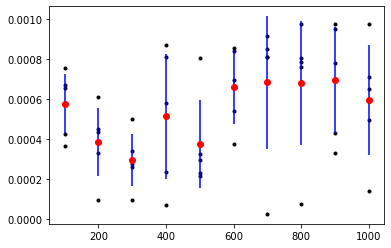

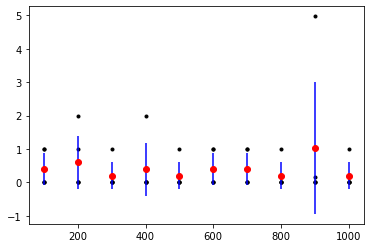

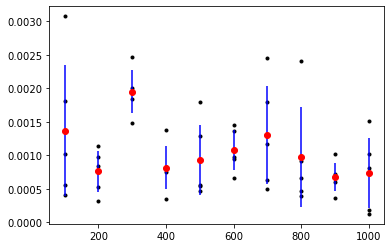

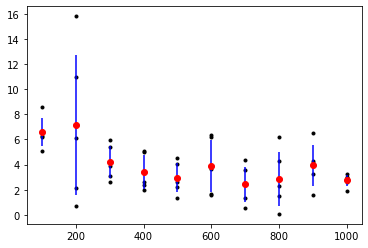

In [69]:
# Sphere, nomod
plt.scatter(np.repeat(MAXT, trials), F_G_SPHERE, c='#000000',marker='.')
plt.errorbar(MAXT, np.average(F_G_SPHERE,axis=1), np.std(F_G_SPHERE,axis=1), ecolor='blue', c='#FF0000', linestyle='None', marker='o')
plt.show()
# Rastragin, nomod
plt.scatter(np.repeat(MAXT, trials), F_G_RASTRA, c='#000000',marker='.')
plt.errorbar(MAXT, np.average(F_G_RASTRA,axis=1), np.std(F_G_RASTRA,axis=1), ecolor='blue', c='#FF0000', linestyle='None', marker='o')
plt.show()
# Sphere, mod
plt.scatter(np.repeat(MAXT, trials), F_G_SPHERE_M, c='#000000',marker='.')
plt.errorbar(MAXT, np.average(F_G_SPHERE_M,axis=1), np.std(F_G_SPHERE_M,axis=1), ecolor='blue', c='#FF0000', linestyle='None', marker='o')
plt.show()
# Rastragin, mod
plt.scatter(np.repeat(MAXT, trials), F_G_RASTRA_M, c='#000000',marker='.')
plt.errorbar(MAXT, np.average(F_G_RASTRA_M,axis=1), np.std(F_G_RASTRA_M,axis=1), ecolor='blue', c='#FF0000', linestyle='None', marker='o')
plt.show()